In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [39]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from studentsperformance', con=engine)
engine.dispose()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


[(1233.4799726707836, 0.0), (88.0083349548674, 0.0), (141.6378240717818, 0.0)]
[NormaltestResult(statistic=259.4703560154713, pvalue=4.536574867826489e-57), NormaltestResult(statistic=70.4238348783534, pvalue=5.101038001506264e-16), NormaltestResult(statistic=97.39700939472482, pvalue=7.087745794883206e-22)]
[(0.8551403259561483, 0.6520916476990493), (4.544910409141997, 0.10305883867607302), (4.3669582242668366, 0.11264892982675623)]
[NormaltestResult(statistic=0.781687765235166, pvalue=0.6764857589817819), NormaltestResult(statistic=7.000684350924674, pvalue=0.030187052386298912), NormaltestResult(statistic=6.674770727967538, pvalue=0.03552973370241977)]


(array([ 6.,  5., 29., 67., 68., 88., 74., 66., 31., 22.]),
 array([ 31.79992732,  75.35388426, 118.90784119, 162.46179813,
        206.01575506, 249.56971199, 293.12366893, 336.67762586,
        380.2315828 , 423.78553973, 467.33949667]),
 <a list of 10 Patch objects>)

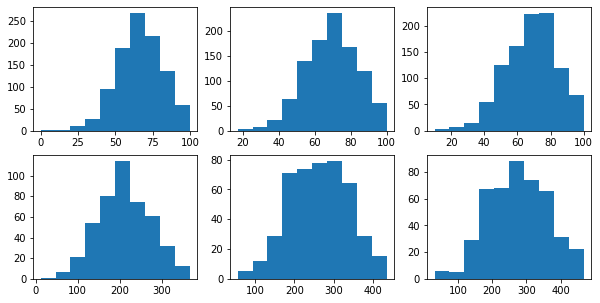

In [44]:
# Question1

from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import scale

jb_stats_sum=[]
norm_stats_sum =[]
jb_stats_box_sum = []
norm_stats_box_sum = []
for exam in ['math score', 'reading score', 'writing score']:
    jb_stats = jarque_bera(np.sqrt(data[exam]))
    jb_stats_sum.append(jb_stats)
    
    norm_stats = normaltest(np.sqrt(data[exam]))
    norm_stats_sum.append(norm_stats)
    
    
    d = data[(data[exam].dropna())&(data[exam]>0)]
    
    jb_stats_box = jarque_bera(boxcox(d[exam])[0])
    jb_stats_box_sum.append(jb_stats_box)
    
    norm_stats_box = normaltest(boxcox(d[exam])[0])
    norm_stats_box_sum.append(norm_stats_box)
    
print(jb_stats_sum)
print(norm_stats_sum)
print(jb_stats_box_sum)
print(norm_stats_box_sum)


plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.hist(data['math score'])
plt.subplot(2,3,2)
plt.hist(data['reading score'])
plt.subplot(2,3,3)
plt.hist(data['writing score'])

plt.subplot(2,3,4)
plt.hist(boxcox(d['math score'])[0])
plt.subplot(2,3,5)
plt.hist(boxcox(d['reading score'])[0])
plt.subplot(2,3,6)
plt.hist(boxcox(d['writing score'])[0])


(15.453387913085168, 0.00044089934264401887)
NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)
(2.4353987431906026, 0.29591016374203183)
NormaltestResult(statistic=2.779857245981238, pvalue=0.2490930835165177)


(array([  4.,  14.,  36., 123., 167., 222., 204., 128.,  73.,  29.]),
 array([ 14.97225385,  60.02010088, 105.06794791, 150.11579495,
        195.16364198, 240.21148901, 285.25933604, 330.30718308,
        375.35503011, 420.40287714, 465.45072418]),
 <a list of 10 Patch objects>)

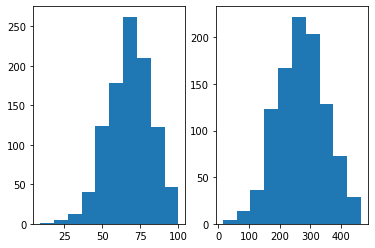

In [58]:
# question2
data['weighted_avg'] = (data['math score'] + data['reading score'] + data['writing score'])/3

jb_stats = jarque_bera(data['weighted_avg'])
norm_stats = normaltest(data['weighted_avg'])
print(jb_stats)
print(norm_stats)

jarque_bera_box = jarque_bera(boxcox(data['weighted_avg'])[0])
norm_stats_box = normaltest(boxcox(data['weighted_avg'])[0])
print(jarque_bera_box)
print(norm_stats_box)

plt.subplot(1,2,1)
plt.hist(data['weighted_avg'])

plt.subplot(1,2,2)
plt.hist(boxcox(data['weighted_avg'])[0])

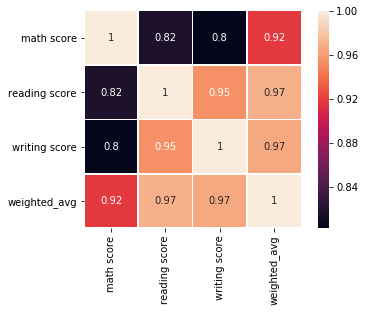

In [63]:
# question3

data1 = data[['math score', 'reading score', 'writing score', 'weighted_avg']]
corr = data.corr()
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

# average score has a higher correlation with other scores, so average score should used as the target variable

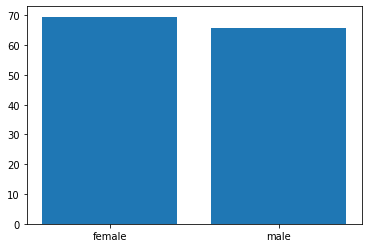

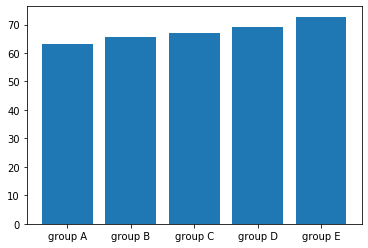

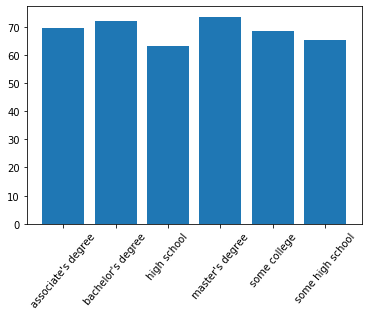

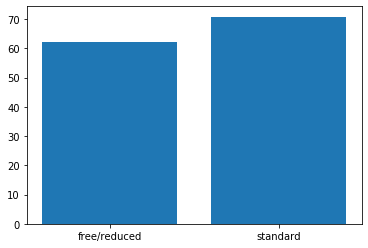

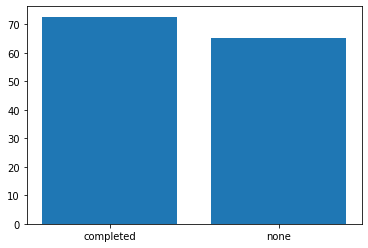

In [81]:
# question3

plt.bar(data.groupby('gender')['weighted_avg'].mean().index ,data.groupby('gender')['weighted_avg'].mean())
plt.show()

plt.bar(data.groupby('race/ethnicity')['weighted_avg'].mean().index ,data.groupby('race/ethnicity')['weighted_avg'].mean())
plt.show()

plt.bar(data.groupby('parental level of education')['weighted_avg'].mean().index ,data.groupby('parental level of education')['weighted_avg'].mean())
plt.xticks(rotation=50)
plt.show()

plt.bar(data.groupby('lunch')['weighted_avg'].mean().index ,data.groupby('lunch')['weighted_avg'].mean())
plt.show()

plt.bar(data.groupby('test preparation course')['weighted_avg'].mean().index ,data.groupby('test preparation course')['weighted_avg'].mean())
plt.show()